In [16]:
from pathlib import Path

# OR if in a notebook:
BASE_DIR = Path.cwd().parent.parent.parent

DATA_RAW = BASE_DIR / "data" / "raw"
DATA_PROCESSED = BASE_DIR / "data" / "processed"

print("BASE_DIR:", BASE_DIR)
print("DATA_RAW exists:", DATA_RAW.exists())
print("DATA_PROCESSED exists:", DATA_PROCESSED.exists())

BASE_DIR: /files/capstone_project/game-market-event-analyzer
DATA_RAW exists: True
DATA_PROCESSED exists: True


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

DATA_PROCESSED = BASE_DIR / "data" / "processed"

# Load the events with AR and CAR already computed
events = pd.read_csv(DATA_PROCESSED / "events_with_car.csv")

events["event_date"] = pd.to_datetime(events["event_date"])
events["trading_date"] = pd.to_datetime(events["trading_date"])

events.head()

,event_id,event_date,publisher,ticker_x,studio,is_rockstar,game,franchise,event_type,sentiment,...,notes,trading_date,ticker_y,adj_close,return,market_return,ticker,AR_event,CAR_m1_p1,CAR_m5_p5
0,ATVI_2019_CODMOBILE_LAUNCH,2019-10-01,Activision,ATVI,TiMi Studios,0,Call of Duty: Mobile,Call of Duty,Game_release,Positive,...,Global launch of Call of Duty: Mobile expandin...,2019-10-01,ATVI,94.157463,-0.010938,-0.012258,ATVI,-0.001198,0.005278,-0.013979
1,ATVI_2019_CODMW_RELEASE,2019-10-25,Activision,ATVI,Infinity Ward,0,Call of Duty: Modern Warfare,Call of Duty,Game_release,Positive,...,Major franchise reboot for Call of Duty with s...,2019-10-25,ATVI,93.729248,0.003438,0.004073,ATVI,-0.000318,0.000526,-0.002328
2,ATVI_2020_WARCRAFT3_REFORGED,2020-01-28,Activision Blizzard,ATVI,Blizzard,0,Warcraft III: Reforged,Warcraft,Bad_review,Negative,...,Release of Warcraft III: Reforged with strong ...,2020-01-28,ATVI,108.901489,0.012120,0.010054,ATVI,0.003422,0.003371,-0.024705
3,ATVI_2020_WARZONE_LAUNCH,2020-03-10,Activision,ATVI,Infinity Ward,0,Call of Duty: Warzone,Call of Duty,Game_release,Positive,...,Launch of free-to-play battle royale Warzone w...,2020-03-10,ATVI,100.609787,0.024274,0.049396,ATVI,-0.016937,0.001569,-0.031189
4,ATVI_2021_DIABLO2_RESURRECTED,2021-09-23,Activision Blizzard,ATVI,Blizzard,0,Diablo II: Resurrected,Diablo,Game_release,Neutral,...,Launch of D2R with mixed expectations and some...,2021-09-23,ATVI,125.080391,0.011788,0.012135,ATVI,0.001370,0.004392,0.012324


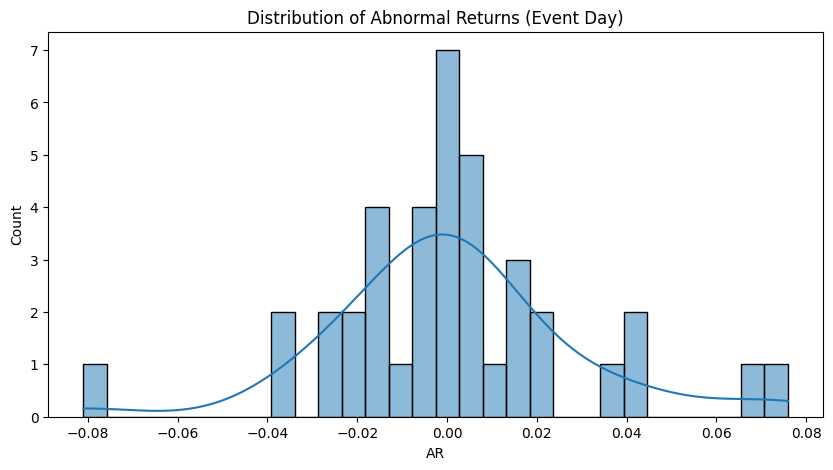

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(events["AR_event"].dropna(), bins=30, kde=True)
plt.title("Distribution of Abnormal Returns (Event Day)")
plt.xlabel("AR")
plt.ylabel("Count")
plt.show()

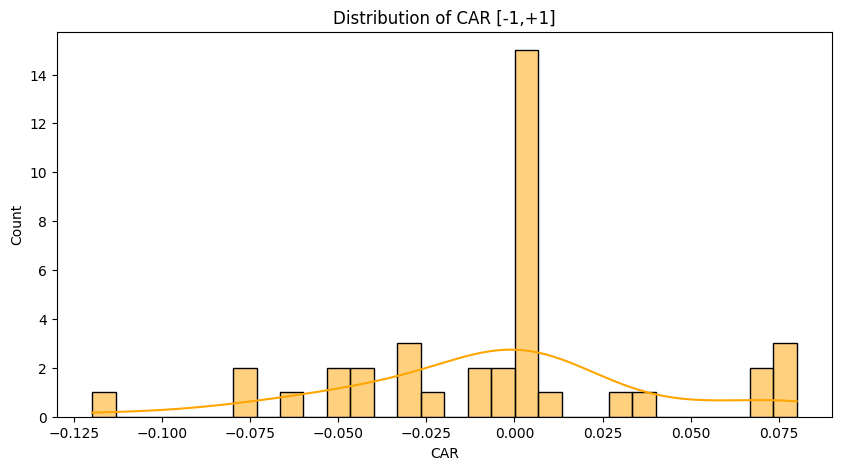

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(events["CAR_m1_p1"].dropna(), bins=30, kde=True, color='orange')
plt.title("Distribution of CAR [-1,+1]")
plt.xlabel("CAR")
plt.ylabel("Count")
plt.show()

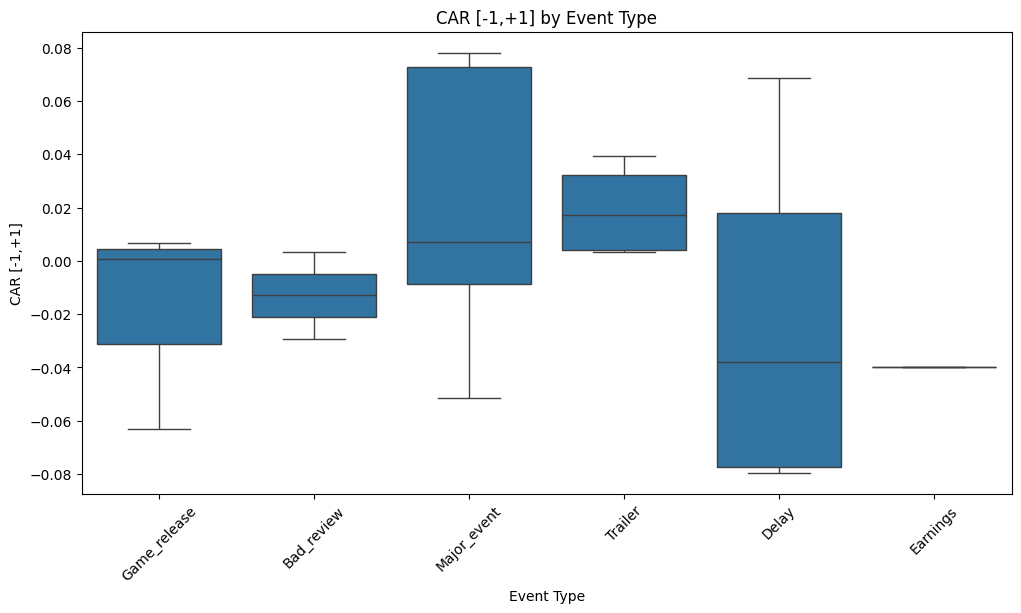

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=events,
    x="event_type",
    y="CAR_m1_p1",
    showfliers=False  # optional, remove extreme outliers
)
plt.xticks(rotation=45)
plt.title("CAR [-1,+1] by Event Type")
plt.ylabel("CAR [-1,+1]")
plt.xlabel("Event Type")
plt.show()

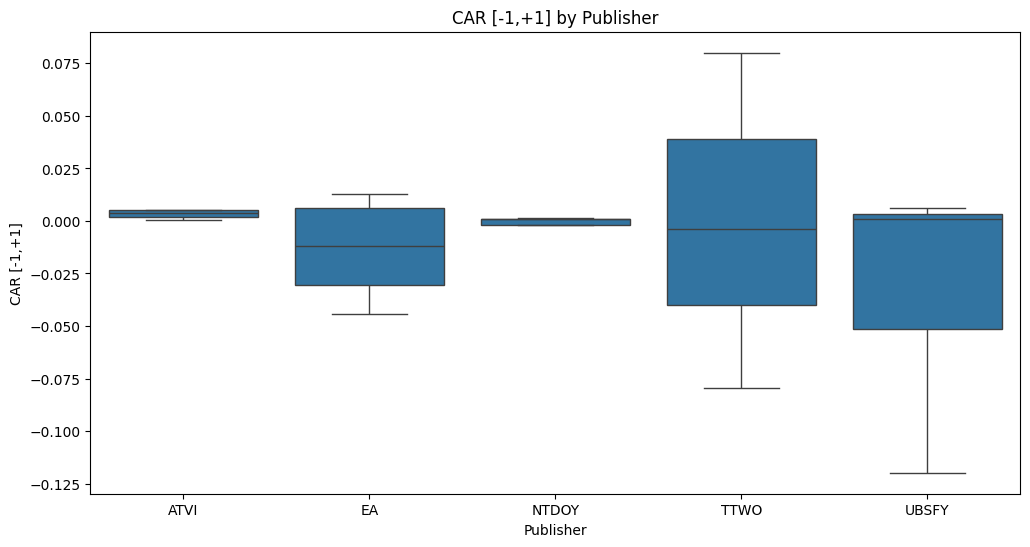

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=events,
    x="ticker",
    y="CAR_m1_p1",
    showfliers=False
)
plt.title("CAR [-1,+1] by Publisher")
plt.ylabel("CAR [-1,+1]")
plt.xlabel("Publisher")
plt.show()

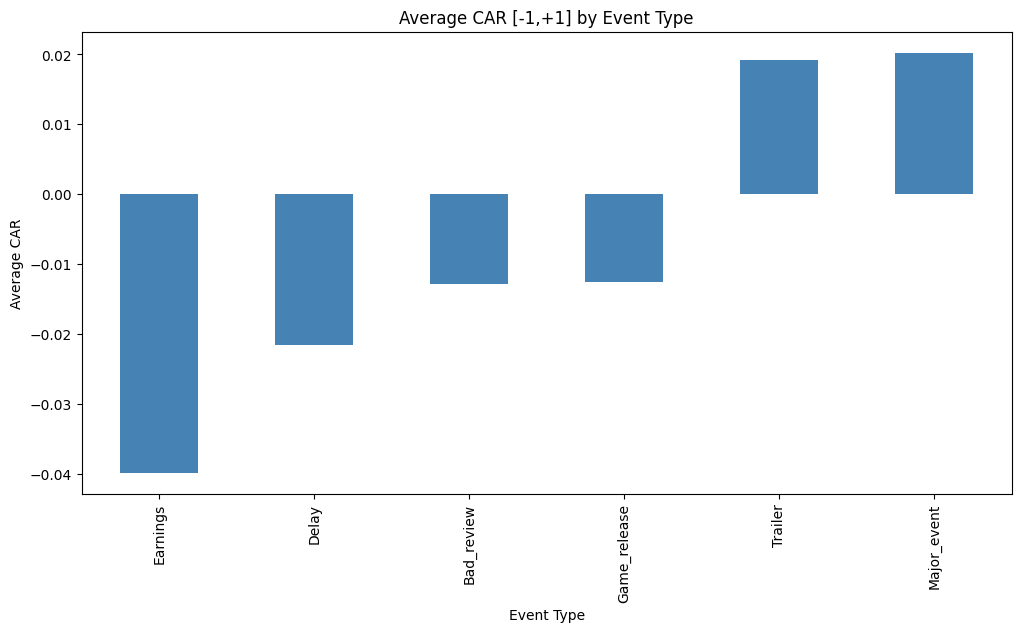

In [23]:
car_means = events.groupby("event_type")["CAR_m1_p1"].mean().sort_values()

plt.figure(figsize=(12,6))
car_means.plot(kind="bar", color="steelblue")
plt.title("Average CAR [-1,+1] by Event Type")
plt.ylabel("Average CAR")
plt.xlabel("Event Type")
plt.show()

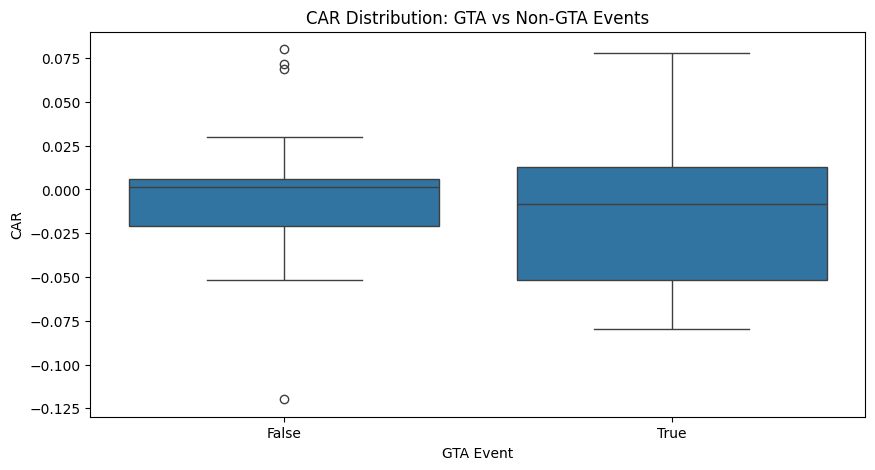

In [24]:
events["is_gta"] = events["franchise"].str.contains("GTA", case=False, na=False)

plt.figure(figsize=(10,5))
sns.boxplot(data=events, x="is_gta", y="CAR_m1_p1")
plt.title("CAR Distribution: GTA vs Non-GTA Events")
plt.xlabel("GTA Event")
plt.ylabel("CAR")
plt.show()

In [25]:
gta_delay = events[events["event_id"].str.contains("GTA6", case=False, na=False)]
gta_delay[["event_id", "event_type", "event_date", "trading_date", "AR_event", "CAR_m1_p1"]]

,event_id,event_type,event_date,trading_date,AR_event,CAR_m1_p1
27,TTWO_2022_GTA6_DEV-ANNOUNCEMENT,Major_event,2022-02-04,2022-02-04,0.068098,0.078164
30,TTWO_2023_GTA6_TRAILER1,Trailer,2023-12-05,2023-12-05,-0.005089,0.004367
31,TTWO_2025_GTA6_DELAY1,Delay,2025-05-02,2025-05-02,-0.081012,-0.079546
32,TTWO_2025_GTA6_TRAILER2,Trailer,2025-05-06,2025-05-06,0.035617,0.039229
33,TTWO_2025_GTA6_DELAY2,Delay,2025-11-06,2025-11-06,0.000691,-0.076612
